In [16]:
import diamondSearch
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Full Motion Estimate

In [18]:
prim_orig = cv2.imread('prim1.png')
prim_shifted_o = cv2.imread('prim2.png')
grad_o = cv2.imread('grad1.png')
grad_shifted_o = cv2.imread('grad2.png')
car_o = cv2.imread('car1.png')
car_shifted_o = cv2.imread('car2.png')

prim = cv2.imread('prim1.png', cv2.IMREAD_GRAYSCALE)
prim_shifted = cv2.imread('prim2.png', cv2.IMREAD_GRAYSCALE)
grad = cv2.imread('grad1.png', cv2.IMREAD_GRAYSCALE)
grad_shifted = cv2.imread('grad2.png', cv2.IMREAD_GRAYSCALE)
car = cv2.imread('car1.png', cv2.IMREAD_GRAYSCALE)
car_shifted = cv2.imread('car2.png', cv2.IMREAD_GRAYSCALE)

In [19]:
def sad(mat1, mat2):
    return np.sum(cv2.absdiff(mat1, mat2))

In [20]:
def match_blocks(ref, shifted, area, win, x, y):
    h, w = ref.shape
    left = max(x - area * win, 0)
    top = max(y - area * win, 0)
    width = area * 2 * win
    height = area * 2 * win
    right = min(left + width, w - area)
    bottom = min(top + height, h - area)
    ref_block = ref[y:y+area, x:x+area]
    best_dist = 1.e30
    best_x = best_y = -1
    s1, t1 = area/4, area/4
    h2, w2 = area/2, area/2
    y3, x3 = y+s1, x+t1
    if sad(ref_block[int(s1):int(s1+h2), int(t1):int(t1+w2)], shifted[int(y3):int(y3+h2), int(x3):int(x3+w2)]) <= 0:
        return [-100000, -100000, 0]
    for y2 in range(top, bottom):
        for x2 in range(left, right):
            dist = sad(ref_block, shifted[y2:y2+area, x2:x2+area])
            if dist < best_dist:
                best_dist = dist
                best_x = x2
                best_y = y2
    if best_x == x and best_y == y:
        return [-100000, -100000, best_dist]
    return [best_x - x, best_y - y, best_dist]

In [26]:
def match(ref, shifted, area, win):
    h, w = ref.shape
    motion_vectors = []
    for y in range(0, h - area, area):
        #print(y, '/', h - area)
        for x in range(0, w - area, area):
            motion_vector = match_blocks(ref, shifted, area, win, x, y)
            if motion_vector[0] != -100000:
                motion_vectors.append([x, y, motion_vector[0], motion_vector[1]])
    return motion_vectors

In [37]:
def full(ref, shifted, ref_path, area, win):
    motion_vectors = match(ref, shifted, area, win)
    result = cv2.imread(ref_path)
    vecs = []
    for vec in motion_vectors:
        cv2.arrowedLine(result, (int(vec[0] + area/2), int(vec[1] + area/2)), (int(vec[0]+vec[2] + area/2), int(vec[1]+vec[3] + area/2)), (255, 0, 0))
        vecs.append([vec[2], vec[3]])
    print('difference=', np.sum(np.square(np.asarray(vecs) - [10, 5])))
    return result

In [38]:
res_prim_full = full(prim, prim_shifted, 'prim1.png', 8, 4)

difference= 67709


In [39]:
res_grad_full = full(grad, grad_shifted, 'grad1.png', 8, 4)

difference= 783148


In [40]:
res_car_full = full(car, car_shifted, 'car1.png', 8, 4)

difference= 2168806


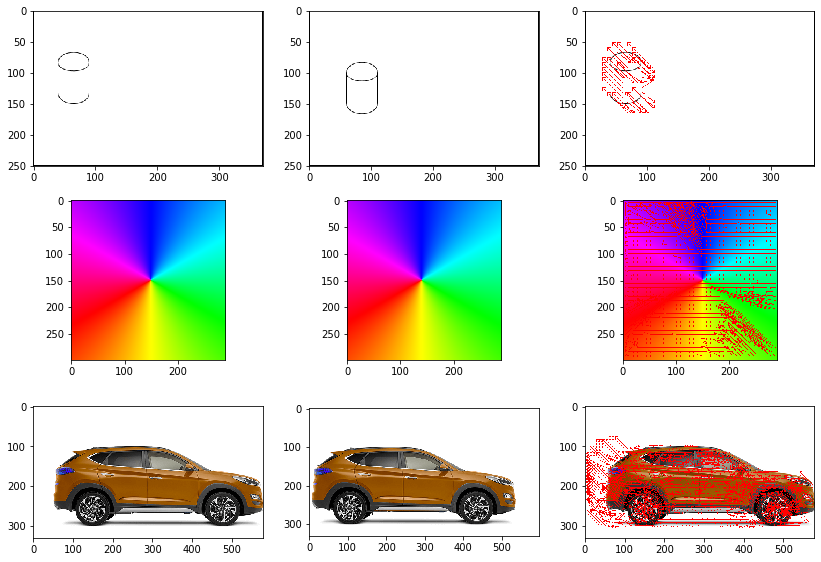

In [41]:
plt.rcParams["figure.figsize"] = [14, 10]
plt.subplot(331)
plt.imshow(prim_orig)
plt.subplot(332)
plt.imshow(prim_shifted_o)
plt.subplot(333)
plt.imshow(res_prim_full)

plt.subplot(334)
plt.imshow(grad_o)
plt.subplot(335)
plt.imshow(grad_shifted_o)
plt.subplot(336)
plt.imshow(res_grad_full)

plt.subplot(337)
plt.imshow(car_o)
plt.subplot(338)
plt.imshow(car_shifted_o)
plt.subplot(339)
plt.imshow(res_car_full)
plt.savefig('full_result.png')
plt.show()

Diamond Motion Estimate

In [32]:
def diamond_search(r, s, n, p, path):
    ref = r.tolist()
    shifted = s.tolist()
    ds = diamondSearch.DiamondSearch(ref, shifted, n, p)
    motion_vectors = np.asarray(ds.motionEstimation())
    result = cv2.imread(path)
    
    col_ind = 0
    for column in motion_vectors:
        cell_ind = 0
        for vec in column:
            if vec[0] != 0 or vec[1] != 0:
                cv2.arrowedLine(result, (cell_ind, col_ind), (cell_ind + int(vec[1])*3, col_ind + int(vec[0])*3), (255, 0, 0))
            cell_ind += n
        col_ind += n
    return result

In [33]:
res_prim = diamond_search(prim, prim_shifted, 2, 2, 'prim1.png')

In [34]:
res_grad = diamond_search(grad, grad_shifted, 8, 4, 'grad1.png')

In [35]:
res_car = diamond_search(car, car_shifted, 8, 4, 'car1.png')

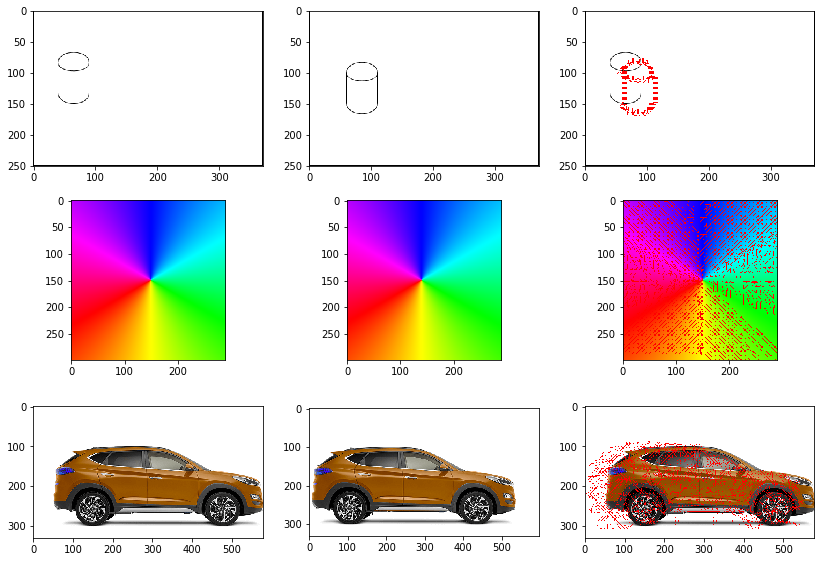

In [36]:
plt.rcParams["figure.figsize"] = [14, 10]
plt.subplot(331)
plt.imshow(prim_orig)
plt.subplot(332)
plt.imshow(prim_shifted_o)
plt.subplot(333)
plt.imshow(res_prim)

plt.subplot(334)
plt.imshow(grad_o)
plt.subplot(335)
plt.imshow(grad_shifted_o)
plt.subplot(336)
plt.imshow(res_grad)

plt.subplot(337)
plt.imshow(car_o)
plt.subplot(338)
plt.imshow(car_shifted_o)
plt.subplot(339)
plt.imshow(res_car)
plt.savefig('diamond_result.png')
plt.show()
